#A/B testing



In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.graphics.boxplots as smgb

(-2.9165899183653465, 0.0036179670543104326)


{'boxes': [<matplotlib.lines.Line2D at 0x7feff56827b8>],
 'caps': [<matplotlib.lines.Line2D at 0x7feff568bb38>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feff569d2b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feff5699ac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feff5682b38>,
  <matplotlib.lines.Line2D at 0x7feff568b390>]}

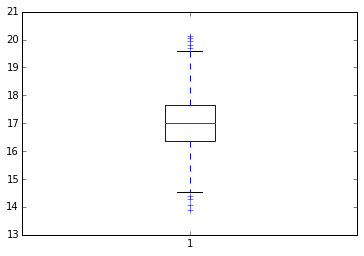

In [5]:
# Start by generating two datasets.

x = ss.norm.rvs(size=1000, loc=17)
y = ss.norm.rvs(size=1000, loc=17.1)

# We can compute the p-value with a T-test.  The T-distribution
# can be thought of as a normal distribution optimized for small
# datasets.  This definition would make a proper statistician shudder
# at its simplicity, but, to the practicing non-statistician, the
# simplification will work almost every time.
print(ss.ttest_rel(x, y))

# Let's make a box plot of the data.  Box plots show us the
# median, first and third quartiles, and then plots whiskers at
# 1.5 IQR's from the first and third quartiles (2.5 IQR's from the
# median).  IQR is the Inter-Quartile Range and is the distance
#from the first to the third quartile.  Any points outside the
# whiskers are plotted with dots.
plt.boxplot(x)

In [6]:
# We can plot the boxplot horizontally if we want.
# Exercise: Type plt.boxplot? to see other options.

{'boxes': [<matplotlib.lines.Line2D at 0x7feff562b278>],
 'caps': [<matplotlib.lines.Line2D at 0x7feff56335f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feff5637d30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feff5637588>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feff562b5f8>,
  <matplotlib.lines.Line2D at 0x7feff562be10>]}

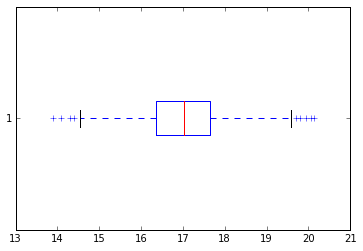

In [7]:
plt.boxplot(x, vert=False)

In [8]:
plt.boxplot?

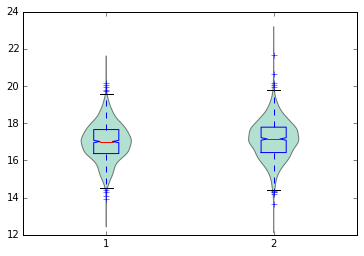

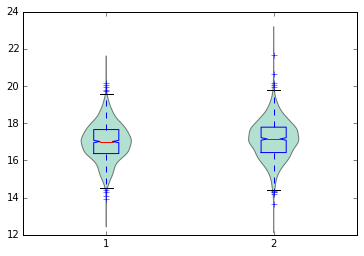

In [10]:
# Violin plots are like boxplots in spirit, but they show us the
# estimated probability density of the distribution.  Showing the
# density on both sides is just to be pretty, you can show it
# only on one side if you prefer.
smgb.violinplot([x, y])

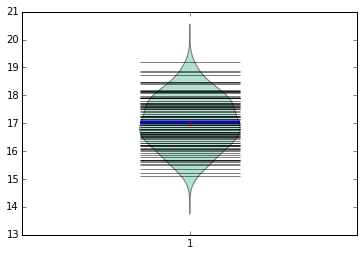

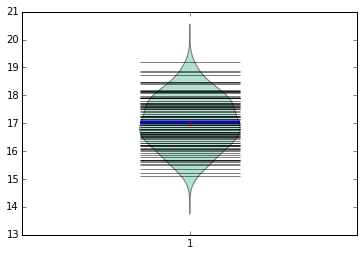

In [14]:
# Bean plots show all the data points.  Let's plot
# a smaller sample than x, since plotting x hides
# the density estimator with all the lines.
# (Try it!)
smgb.beanplot([ss.norm.rvs(size=100, loc=17)])

In [15]:
# The Kolmogorov-Smirnov test measures the difference between
# two probability distributions.  To a very good approximation,
# it just measures the area between the two curves.
#
# In one version, we measure the difference between our distribution
# and a normal distribution.  We explicitly generated a normal
# sample, so it is no surprise that Kolmogorov-Smirnov thinks that
# our sample looks normal (D=1) with small p-value (0).
ss.kstest(x, 'norm')

(1.0, 0.0)

In [17]:
# In another version, we measure the difference between two
# sample distributions.  Recall that they are both normal but
# centered slightly differently.
ss.ks_2samp(x, y)

(0.077999999999999958, 0.0042577262335448925)

In [18]:
# Exercises:
#
# Consider values like this:
# x = ss.norm.rvs(size=1000)
# y = ss.norm.rvs(size=1000)
# y = ss.norm.rvs(size=1000) + .01 * ss.norm.rvs(size=1000)
# y = ss.norm.rvs(size=1000) + ss.norm.rvs(size=1000)
